In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

from scripts.constants import PATH_TO_DATA
from scripts.postprocessing import PostProcessor

PATH_TO_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data'

In [2]:
rdf_files = []

for root, folders, _ in os.walk(PATH_TO_DATA):
    for folder in folders:
        if folder.startswith('2021-07'):
            path = os.path.join(root, folder)
            for file in os.listdir(path):
                if 'rdf_T_0.2' in file:
                    rdf_files.append(os.path.join(path, file))


In [3]:
max_radiuses = []
rdf_sums = []

for rdf_file in rdf_files:
    if ('2021-09-10') in rdf_file:
        rdf_df = pd.read_csv(rdf_file, sep=';')
        max_radiuses.append(rdf_df.radius.max())
        rdf_sums.append(rdf_df.rdf.sum())
    
aggregated = pd.DataFrame({
    'max_radiuses': max_radiuses,
    'rdf_sums': rdf_sums,
})
aggregated

,max_radiuses,rdf_sums


array([[<AxesSubplot:title={'center':'max_radiuses'}>,
        <AxesSubplot:title={'center':'rdf_sums'}>]], dtype=object)

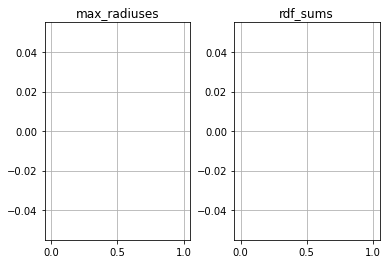

In [4]:
aggregated[aggregated.max_radiuses == 6.12].hist()